<a href="https://colab.research.google.com/github/Mahabubjamil/ColabNotebook/blob/main/Sentiment_analysis_pre_defense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk


In [48]:
import csv
df = pd.read_csv('/content/Reviews.csv',encoding='utf-8')

In [49]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [50]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [51]:
print(df.shape)
df = df.head(500)

(38110, 10)


In [52]:
print(df.shape)

(500, 10)


**Quick EDA**

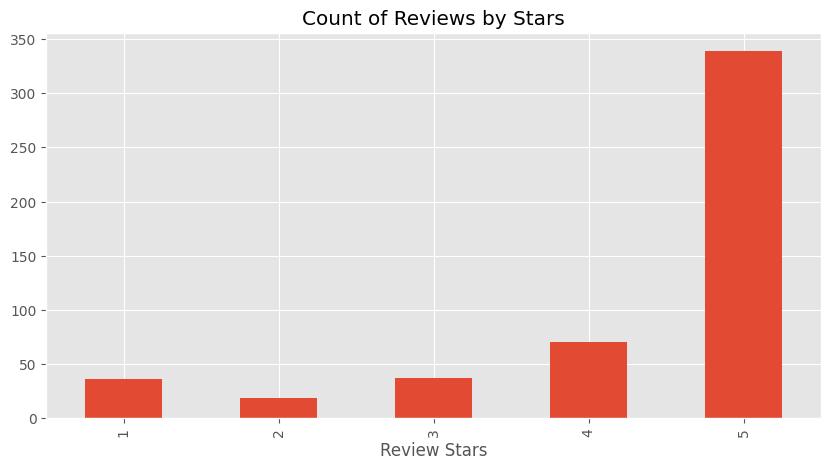

In [53]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

***Basic NLTK***

In [54]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [57]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [58]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [59]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [60]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


***VADER Sentiment Analysis***

In [61]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [62]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [63]:
sia

In [64]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [65]:
sia.polarity_scores('This is the worst things ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [66]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [67]:
#Running the polarity scores in entire datasets
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [68]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [69]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df,how='left')

In [70]:
#now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


***Plot Vader Results***

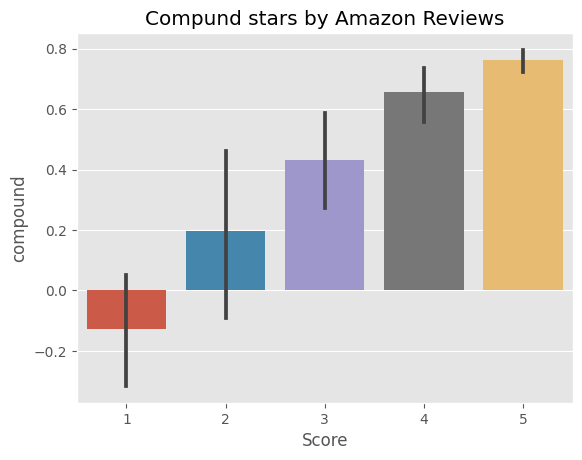

In [71]:
ax = sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compund stars by Amazon Reviews')
plt.show()

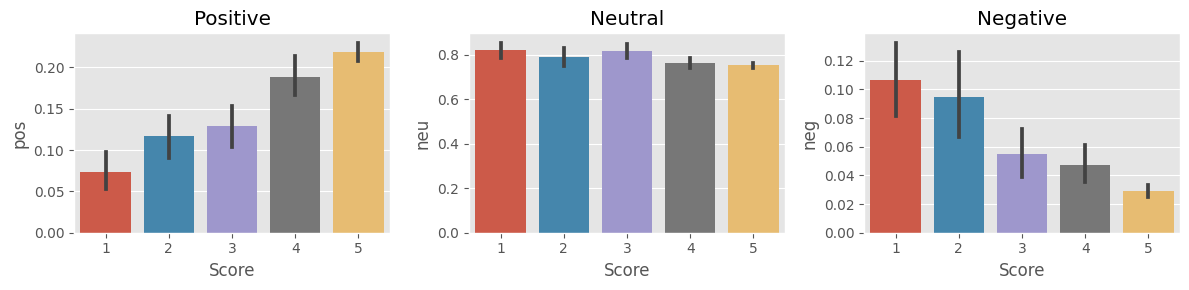

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

***Roberta Pretrained Model***

In [73]:
# from transformers import AutoTokenizer
# from transformers import AutoModelForSequenceClassification
# from scipy.special import softmax


In [74]:
# MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [75]:
# #VADER results on examples
# print(example)
# sia.polarity_scores(example)

In [76]:
# #Run for ROBERTA model
# encoded_text = tokenizer(example,return_tensors='pt')

In [77]:
# output = model(**encoded_text)
# scores = output[0][0].detach().numpy()
# scores = softmax(scores)
# scores_dict = {
#     'roberta_neg' : scores[0],
#     'roberta_neu' : scores[1],
#     'roberta_pos' : scores[2]
# }
# print(scores_dict)

In [78]:
# def polarity_scores_roberta(example):
#     encoded_text = tokenizer(example, return_tensors='pt')
#     output = model(**encoded_text)
#     scores = output[0][0].detach().numpy()
#     scores = softmax(scores)
#     scores_dict = {
#         'roberta_neg' : scores[0],
#         'roberta_neu' : scores[1],
#         'roberta_pos' : scores[2]
#     }
#     return scores_dict

In [79]:
# res = {}
# for i, row in tqdm(df.iterrows(), total=len(df)):
#     try:
#         text = row['Text']
#         myid = row['Id']
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
#         roberta_result = polarity_scores_roberta(text)
#         both = {**vader_result_rename, **roberta_result}
#         res[myid] = both
#     except RuntimeError:
#         print(f'Broke for id {myid}')

In [80]:
# results_df = pd.DataFrame(res).T
# results_df = results_df.reset_index().rename(columns={'index': 'Id'})
# results_df = results_df.merge(df, how='left')

In [81]:
# results_df.head(4)

***Compare Sores Between Models***

In [82]:
# results_df.columns

In [83]:
# sns.pairplot(data=results_df,
#              vars=['vader_neg', 'vader_neu', 'vader_pos',
#                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
#             hue='Score',
#             palette='tab10')
# plt.show()

In [84]:
# results_df.query('Score == 1') \
#     .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [85]:
vaders.query('Score == 1') \
    .sort_values('pos', ascending=False)['Text'].value_counts()

So we cancelled the order.  It was cancelled without any problem.  That is a positive note...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [86]:
vaders.query('Score == 1') \
    .sort_values('pos', ascending=False)['Text'].value_counts()

So we cancelled the order.  It was cancelled without any problem.  That is a positive note...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [87]:
# #negative sentiment 5 star review
# results_df.query('Score == 5')\
# .sort_values('roberta_neg', ascending = False)['Text'].values[0]

In [88]:
# results_df.query('Score == 5')\
# .sort_values('vader_neg', ascending = False)['Text'].values[0]

In [89]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [90]:
sent_pipeline('I love this life')

[{'label': 'POSITIVE', 'score': 0.9998776912689209}]

In [91]:
# polarity_scores_roberta('I love this life')

In [92]:
sia.polarity_scores('I love this life')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [93]:
sia.polarity_scores('i have overcome from an accident')

{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

In [94]:
# sent_pipeline('i have overcome from an accident')

In [95]:
# polarity_scores_roberta('i have overcome from an accident')

In [96]:
# polarity_scores_roberta('saty away from negative people')

In [97]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text, rating):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)

    compound_score = scores['compound']

    if compound_score >= 0.5 and rating == 5:
        sentiment = 'This product and service is excellent. Very Positive:'
    elif compound_score >= 0.05 and rating >= 4:
        sentiment = 'This product and service is good. Positive:'
    elif compound_score > -0.05 and rating >= 2:
        sentiment = 'This product and services need some improvements. Neutral:'
    elif compound_score <= -0.05 and rating < 2:
        sentiment = 'This product and services need urgent modifications. Negative:'
    else:
        sentiment = 'Need some modifications. Neutral:'

    print(f"Sentiment for '{text}' with rating: ({rating}) {sentiment} {compound_score}")


In [98]:
analyze_sentiment('The XYZ Wireless Earbuds deliver impressive sound quality and seamless connectivity, making them my go-to choice for on-the-go music and calls. Their sleek design, comfortable fit, and long battery life make them a top-notch option for anyone with an active lifestyle.',5)

Sentiment for 'The XYZ Wireless Earbuds deliver impressive sound quality and seamless connectivity, making them my go-to choice for on-the-go music and calls. Their sleek design, comfortable fit, and long battery life make them a top-notch option for anyone with an active lifestyle.' with rating: (5) This product and service is excellent. Very Positive: 0.8957


In [99]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [100]:
vaders.loc[(vaders['compound'] >= 0.5) & (vaders['Score'] <= 5), 'label'] = 'pos'
vaders.loc[(vaders['compound'] >= 0.5) & (vaders['Score'] >= 4), 'label'] = 'pos'
vaders.loc[(vaders['compound'] > -0.5) & (vaders['Score'] >= 2), 'label'] = 'nue'
vaders.loc[(vaders['compound'] <= -0.5) & (vaders['Score'] < 2), 'label'] = 'neg'


In [101]:
vaders.loc[(vaders['compound'] >= 0.5), 'label'] = 'pos'

vaders.loc[(vaders['compound'] < 0.5) & (vaders['compound'] > -0.5), 'label'] = 'nue'
vaders.loc[(vaders['compound'] <= -0.5), 'label'] = 'neg'

In [102]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,pos
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,neg
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,pos
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,nue
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,pos


In [103]:
vaders.loc[(vaders['label']=='pos'), 'New_label'] = 2
vaders.loc[(vaders['label']=='nue'), 'New_label'] = 1
vaders.loc[(vaders['label']=='neg'), 'New_label'] = 0

In [104]:
vaders.loc[(vaders['label']=='pos'), 'Suggestion'] = 'This product and service is good.can carry on with this.'
vaders.loc[(vaders['label']=='nue'), 'Suggestion'] = 'This product and services need some improvements.'
vaders.loc[(vaders['label']=='neg'), 'Suggestion'] = 'This product and services need urgent modifications.'

In [105]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,New_label,Suggestion
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,pos,2.0,This product and service is good.can carry on ...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,neg,0.0,This product and services need urgent modifica...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,pos,2.0,This product and service is good.can carry on ...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,nue,1.0,This product and services need some improvements.
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,pos,2.0,This product and service is good.can carry on ...


In [106]:
df = vaders
df.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,New_label,Suggestion
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,pos,2.0,This product and service is good.can carry on ...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,neg,0.0,This product and services need urgent modifica...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,pos,2.0,This product and service is good.can carry on ...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,nue,1.0,This product and services need some improvements.
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,pos,2.0,This product and service is good.can carry on ...


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [130]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'vaders' DataFrame and other imports are already defined

# Download the necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the SentimentIntensityAnalyzer (Vader)
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using Vader
def classify_sentiment(text):
    compound_score = sia.polarity_scores(text)['compound']

    if compound_score > 0:
        return 2  # Positive
    elif compound_score == 0:
        return 1  # Neutral
    else:
        return 0  # Negative

# Apply sentiment classification to the entire dataset
vaders['predicted_label'] = vaders['Text'].apply(classify_sentiment)

# Separate the data into texts and labels
texts = vaders['Text']
labels = vaders['New_label']
predicted_labels = vaders['predicted_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test, predicted_labels_train, predicted_labels_test = train_test_split(
    texts, labels, predicted_labels, test_size=0.2, random_state=42
)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predicted_labels_test)

# Display the accuracy and classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_test))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 91.00%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.77         5
         1.0       1.00      0.25      0.40        12
         2.0       0.93      1.00      0.97        83

    accuracy                           0.91       100
   macro avg       0.85      0.75      0.71       100
weighted avg       0.93      0.91      0.89       100



In [131]:
analyze_sentiment('sound quality is good but overall product quality is average.',3)

Sentiment for 'sound quality is good but overall product quality is average.' with rating: (3) This product and services need some improvements. Neutral: 0.2382


In [110]:
sia.polarity_scores('i have overcome from an accident')

{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

In [111]:
label_counts = vaders['label'].value_counts()

In [112]:
count_pos = label_counts.get('pos', 0)
count_neg = label_counts.get('neg', 0)
count_neu = label_counts.get('nue', 0)

print(f"The number of positive labels is: {count_pos}")
print(f"The number of negative labels is: {count_neg}")
print(f"The number of neutral labels is: {count_neu}")

The number of positive labels is: 382
The number of negative labels is: 25
The number of neutral labels is: 93


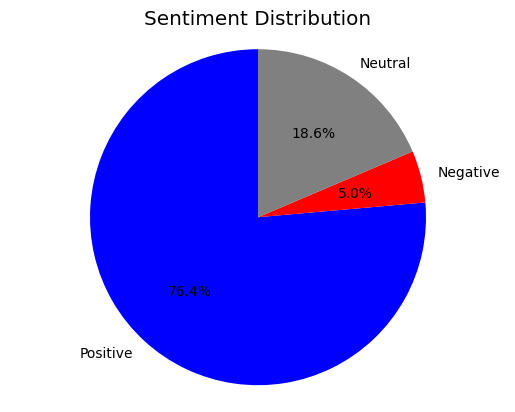

In [113]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [count_pos, count_neg, count_neu]
colors = ['blue', 'red', 'gray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

In [114]:
df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'label', 'New_label', 'Suggestion',
       'predicted_label'],
      dtype='object')

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [116]:
# threshold = 0.1
# vaders['pred_label'] = (vaders['compound'] > threshold).astype(int)

# Assuming you have true labels (ground truth) for each text
# true_labels = vaders['New_label']  # Replace this with your actual true labels

# Compute ROC curve and ROC area
# fpr, tpr, _ = roc_curve(true_labels, vaders['pred_label'])
# roc_auc = auc(fpr, tpr)

# Plot ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve for VADER')
# plt.legend(loc='lower right')
# plt.show()

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [118]:
# threshold = -0.5
# df['pred_label1'] = pd.cut(df['compound'], bins=[-float('inf'), threshold, float('inf')], labels=['neg', 'pos'])

# # Use TF-IDF to vectorize the text
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df['Text'])

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X.toarray())

# # Use K-means clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# df['cluster'] = kmeans.fit_predict(X)

# # Print the results
# print(df[['Text', 'pred_label1', 'cluster']])

# # Visualize the clusters
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
# plt.title('K-means Clustering of Text Data')
# plt.show()

Naive Bayes implementation

In [137]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'vaders' DataFrame and other imports are already defined

# Download the necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the SentimentIntensityAnalyzer (Vader)
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using Vader
def classify_sentiment(text):
    compound_score = sia.polarity_scores(text)['compound']

    if compound_score > 0:
        return 2  # Positive
    elif compound_score == 0:
        return 1  # Neutral
    else:
        return 0  # Negative

# Apply sentiment classification to the entire dataset
vaders['predicted_label'] = vaders['Text'].apply(classify_sentiment)

# Separate the data into texts and labels
texts = vaders['Text']
labels = vaders['New_label']
predicted_labels = vaders['predicted_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test, predicted_labels_train, predicted_labels_test = train_test_split(
    texts, labels, predicted_labels, test_size=0.2, random_state=42
)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, labels_train)

# Predict labels on the testing set
predicted_labels_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(labels_test, predicted_labels_svm)

# Display the accuracy and classification report for SVM
print("SVM Model:")
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_svm))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


SVM Model:
Accuracy: 77.00%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.31      0.42      0.36        12
         2.0       0.88      0.87      0.87        83

    accuracy                           0.77       100
   macro avg       0.40      0.43      0.41       100
weighted avg       0.77      0.77      0.77       100



In [138]:


# Assuming 'vaders' DataFrame and other imports are already defined

# Download the necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the SentimentIntensityAnalyzer (Vader)
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using Vader
def classify_sentiment(text):
    compound_score = sia.polarity_scores(text)['compound']

    if compound_score > 0:
        return 2  # Positive
    elif compound_score == 0:
        return 1  # Neutral
    else:
        return 0  # Negative

# Apply sentiment classification to the entire dataset
vaders['predicted_label'] = vaders['Text'].apply(classify_sentiment)

# Separate the data into texts and labels
texts = vaders['Text']
labels = vaders['New_label']
predicted_labels = vaders['predicted_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test, predicted_labels_train, predicted_labels_test = train_test_split(
    texts, labels, predicted_labels, test_size=0.2, random_state=42
)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Initialize and train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, labels_train)

# Predict labels on the testing set
predicted_labels_nb = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(labels_test, predicted_labels_nb)

# Display the accuracy and classification report for Naive Bayes
print("Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_nb))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Naive Bayes Model:
Accuracy: 85.00%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       1.00      0.17      0.29        12
         2.0       0.85      1.00      0.92        83

    accuracy                           0.85       100
   macro avg       0.62      0.39      0.40       100
weighted avg       0.82      0.85      0.80       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:


# Assuming you have already trained your Naive Bayes model and have the 'vectorizer' object
# If not, you need to load or train the model and vectorizer before using this code.

# Function to classify sentiment using Naive Bayes
def classify_sentiment_naive_bayes(text):
    text_vectorized = vectorizer.transform([text])
    prediction = naive_bayes_classifier.predict(text_vectorized)
    return prediction[0]

# User input for testing
user_input_text = input("Enter a text for sentiment analysis: ")

# Classify sentiment using Naive Bayes
predicted_sentiment_nb = classify_sentiment_naive_bayes(user_input_text)

# Display the result
sentiment_label = "Positive" if predicted_sentiment_nb == 2 else "Negative"
print(f"Predicted sentiment (Naive Bayes): {sentiment_label}")

Enter a text for sentiment analysis: this product is bad
Predicted sentiment (Naive Bayes): Positive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                  Text pred_label  cluster
0    I have bought several of the Vitality canned d...        pos        2
1    Product arrived labeled as Jumbo Salted Peanut...        neg        2
2    This is a confection that has been around a fe...        pos        2
3    If you are looking for the secret ingredient i...        neu        2
4    Great taffy at a great price.  There was a wid...        pos        2
..                                                 ...        ...      ...
495  i rarely eat chips but i saw these and tried t...        pos        0
496  This is easily the best potato chip that I hav...        pos        1
497  Kettle Chips Spicy Thai potato chips have the ...        pos        0
498  Okay, I should not eat potato chips, nor shoul...        pos        1
499  I don't write very many reviews but I have to ...        pos        0

[500 rows x 3 columns]


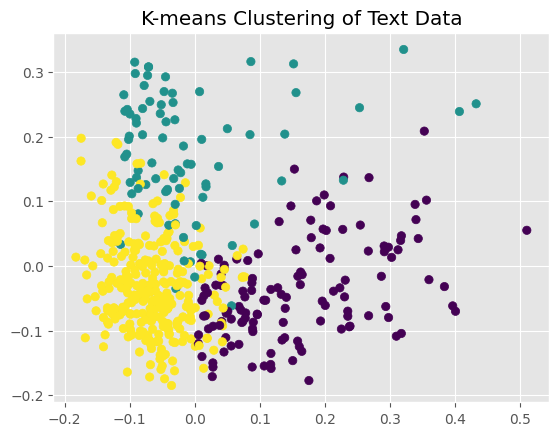

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with columns 'Text' and 'compound'
threshold = -0.5
df['pred_label'] = pd.cut(df['compound'], bins=[-float('inf'), threshold, 0, float('inf')],
                           labels=['neg', 'neu', 'pos'], include_lowest=True)

# Use TF-IDF to vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Use K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Print the results
print(df[['Text', 'pred_label', 'cluster']])

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering of Text Data')
plt.show()

In [121]:
#import pickle

In [122]:
#data = {"model":analyze_sentiment , "Text":"", "Score": [1, 2, 3, 4, 5]}
#with open('saved_steps.pkl', 'wb') as file:
#    pickle.dump(data, file)

In [123]:
#with open('saved_steps.pkl', 'rb') as file:
#    data = pickle.load(file)

#sia_loaded = data["model"]
#Review = data["Text"]
#Stars = data["Score"]

In [124]:
#test = sia_loaded('sound quality is good but overall product quality is average.',3)
#test